### Thinking1
为什么股票预测问题容易出现过拟合，也就是在训练时结果很好，在真实环境中结果没那么好

答：因为股市变幻莫测，股票数据中有很大部分都是噪音，真正可学习复用的规律性很少，所以训练结果再好，在真实环境中也很难有很好的效果，容易出现过拟合。

### Thinking2
Prophet与ARMA/ARIMA相比，优势在哪些地方

答：（1）ARMA/ARIMA模型给出的预测只有一个值，而Prophet给出的预测是一个置信区间，更有现实参考意义；  
（2）ARMA/ARIMA模型为线性模型，且要求数据点时间间隔等长，这使得需要对缺失数据进行补全，因而可能会引入噪音，且无法拟合非线性的关系，而Prophet对长期趋势进行分段线性拟合，降低缺失数据造成的影响，同时对周期性利用傅里叶级数进行非线性拟合，从而又可以很好地拟合非线性关系；  
（3）ARMA/ARIMA模型容易出现过拟合的问题，而Prophet通过参数设置，可以控制对异常点的识别敏感度，从而减少过拟合的发生；  
（4）Prophet引入了holiday的影响因子，可以很好地对因节日引起的数据突变进行预测，更符合实际应用场景；  
（5）Prophet可以加入市场上下限这样的领域知识，从而利用到更多的信息；  
（6）Prophet作图部分已经封装好，使用起来更方便。

### Action1
交通流量预测
JetRail高铁的乘客数量预测
数据集：jetrail.csv，根据过往两年的数据（2012 年 8 月至 2014 年 8月），需要用这些数据预测接下来 7 个月的乘客数量
以每天为单位聚合数据集

In [33]:
import pandas as pd

# 数据加载
train = pd.read_csv('./train.csv', index_col=0)
train

,Datetime,Count
ID,,
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2
...,...,...
18283,25-09-2014 19:00,868
18284,25-09-2014 20:00,732
18285,25-09-2014 21:00,702


In [35]:
# 数据预处理
train['Datetime'] = pd.to_datetime(train['Datetime'], format='%d-%m-%Y %H:%M')
train.set_index('Datetime', inplace=True)
daily_train = train.resample('D').sum() #以天为单位重采样，累计一天各时刻的总和
daily_train

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
...,...
2014-09-21,9102
2014-09-22,14116
2014-09-23,13304


In [36]:
# 数据转化
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train['Count']
daily_train.drop(['Count'], axis=1, inplace=True)
daily_train

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60
...,...,...
2014-09-21,2014-09-21,9102
2014-09-22,2014-09-22,14116
2014-09-23,2014-09-23,13304


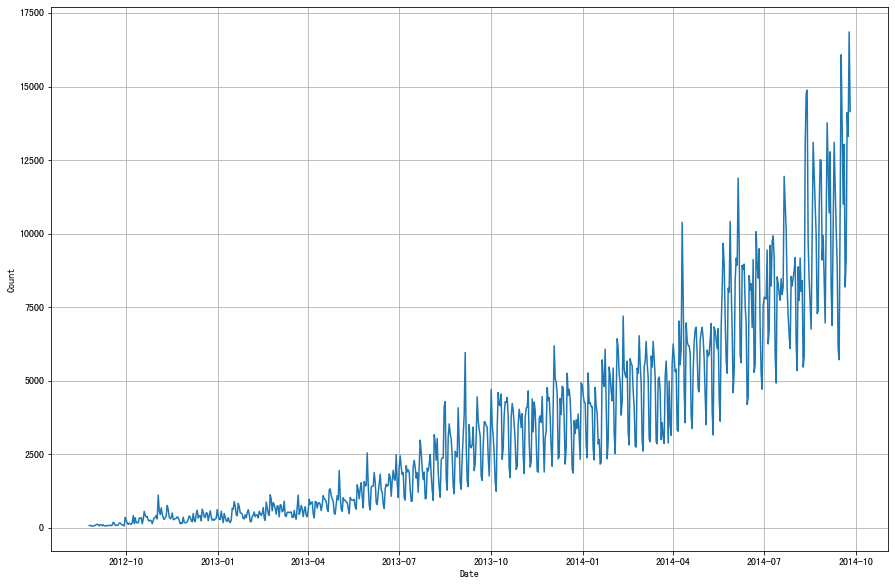

In [37]:
# 原始数据呈现
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(daily_train['y'])
plt.ylabel('Count')
plt.xlabel('Date')
plt.grid()
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')
            ds          yhat    yhat_lower    yhat_upper
970 2015-04-22  19379.674547  17761.527125  21093.332879
971 2015-04-23  19177.787095  17574.727323  20782.404558
972 2015-04-24  18966.920231  17375.531587  20502.794653
973 2015-04-25  17800.238811  16077.140715  19520.162975
974 2015-04-26  17634.520686  15921.484934  19327.761747


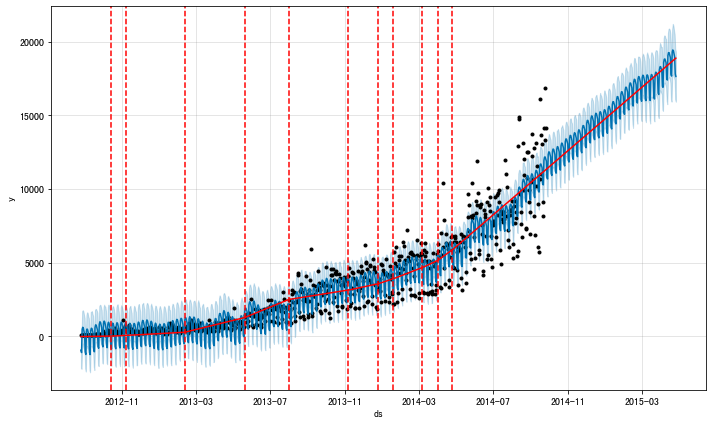

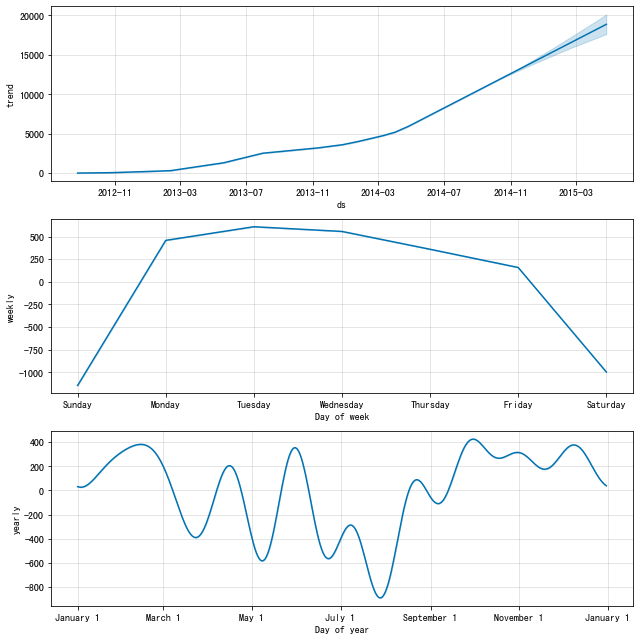

In [53]:
from fbprophet import Prophet

# 模型训练
model = Prophet(changepoint_prior_scale=0.5, weekly_seasonality=True, seasonality_prior_scale=0.5)
model.fit(daily_train)
future = model.make_future_dataframe(periods=213)
forecast = model.predict(future)
print(forecast.columns)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 可视化呈现
from fbprophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast) # 显示突变点
model.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')
            ds          yhat    yhat_lower    yhat_upper
970 2015-04-22  26203.247878  24049.509963  28554.492322
971 2015-04-23  26033.629522  23706.944973  28398.042015
972 2015-04-24  25859.672342  23560.882062  28122.228947
973 2015-04-25  24723.376135  22431.607231  26957.954520
974 2015-04-26  24590.434422  22284.756505  26817.738250


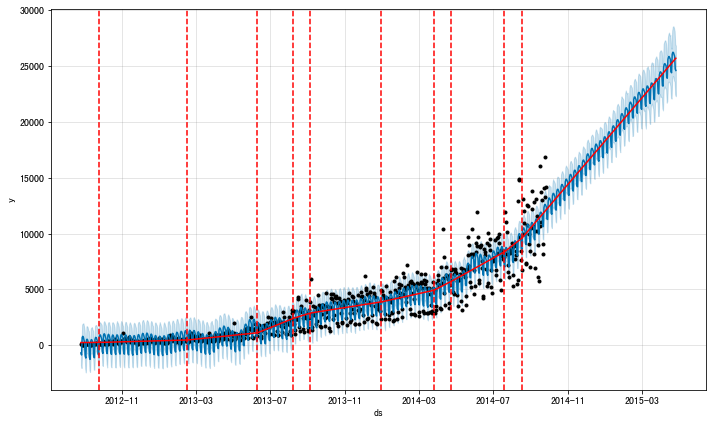

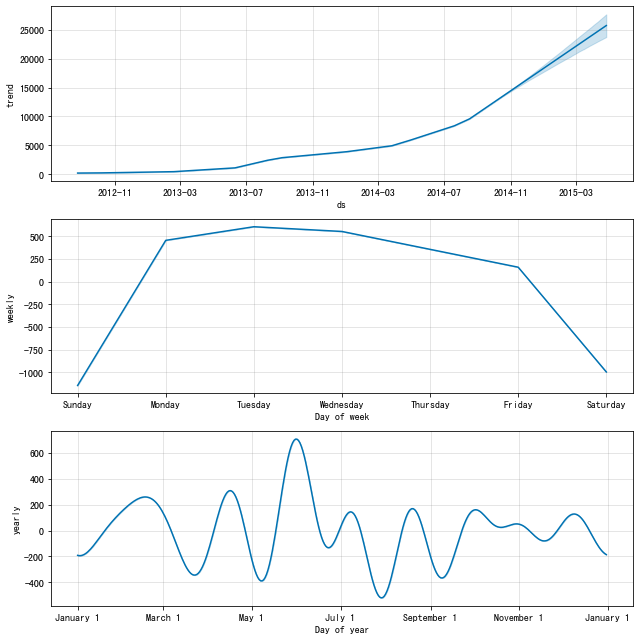

In [57]:
# 增加突变点识别灵活度和识别范围
model = Prophet(changepoint_prior_scale=1, changepoint_range=0.95, weekly_seasonality=True, seasonality_prior_scale=0.5)
model.fit(daily_train)
future = model.make_future_dataframe(periods=213)
forecast = model.predict(future)
print(forecast.columns)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()) 

# 可视化呈现
from fbprophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast) # 显示突变点
model.plot_components(forecast)
plt.show()